<a href="https://colab.research.google.com/github/SiqiHuang18/ECE239as-Deep-learning/blob/ChrisZhang/RNN_testsubjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

%load_ext autoreload
%autoreload 2
from load_data import *
from encoder import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
train_loader, test_loader, val_loader, _ = loader()(subject = 1,
                                             batch_size= 30,
                                             num_validation =37)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)


In [0]:
criteria = F.cross_entropy

def train(epoch, device):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(test_loader=test_loader, mode = 'val', device = None):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device).long()
            output = model(data)
            test_loss += criteria(output, target, reduction='sum').item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).long().sum().item()
        
    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

In [0]:
def main_train(epoches = 8):
    stats = {}
    stats['train'] = []
    stats['val']  = []
    device = torch.device("cuda")

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch,device)
        stats['train'].append(test(train_loader, mode='train',device = device))
        stats['val'].append(test(val_loader, mode='val',device = device))

    print('Test set result:')
    test(test_loader, mode = 'val',device=device)

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/199 (0%)]	Loss: 1.384476
Train Epoch: 0 [150/199 (71%)]	Loss: 1.395086
train loss: 1.3543, Accuracy: 97/199 (49%)
validation loss: 1.3669, Accuracy: 15/38 (39%)

Train Epoch: 1 [0/199 (0%)]	Loss: 1.371310
Train Epoch: 1 [150/199 (71%)]	Loss: 1.326728
train loss: 1.3137, Accuracy: 120/199 (60%)
validation loss: 1.3532, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/199 (0%)]	Loss: 1.273796
Train Epoch: 2 [150/199 (71%)]	Loss: 1.326722
train loss: 1.2678, Accuracy: 117/199 (59%)
validation loss: 1.3357, Accuracy: 13/38 (34%)

Train Epoch: 3 [0/199 (0%)]	Loss: 1.267911
Train Epoch: 3 [150/199 (71%)]	Loss: 1.268530
train loss: 1.2206, Accuracy: 131/199 (66%)
validation loss: 1.3170, Accuracy: 16/38 (42%)

Train Epoch: 4 [0/199 (0%)]	Loss: 1.256126
Train Epoch: 4 [150/199 (71%)]	Loss: 1.19

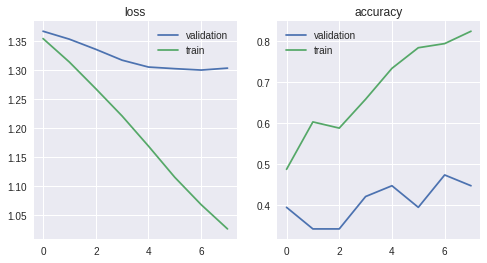

In [17]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 1,
                                             batch_size= 30,
                                             num_validation =38)
model = Model().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.385144
Train Epoch: 0 [150/198 (71%)]	Loss: 1.506462
train loss: 1.3041, Accuracy: 84/198 (42%)
validation loss: 1.3934, Accuracy: 14/38 (37%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.350500
Train Epoch: 1 [150/198 (71%)]	Loss: 1.295594
train loss: 1.1740, Accuracy: 135/198 (68%)
validation loss: 1.3648, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.247857
Train Epoch: 2 [150/198 (71%)]	Loss: 1.039890
train loss: 1.0535, Accuracy: 150/198 (76%)
validation loss: 1.3665, Accuracy: 11/38 (29%)

Train Epoch: 3 [0/198 (0%)]	Loss: 1.121678
Train Epoch: 3 [150/198 (71%)]	Loss: 1.040263
train loss: 0.9490, Accuracy: 170/198 (86%)
validation loss: 1.3708, Accuracy: 12/38 (32%)

Train Epoch: 4 [0/198 (0%)]	Loss: 1.063152
Train Epoch: 4 [150/198 (71%)]	Loss: 0.95

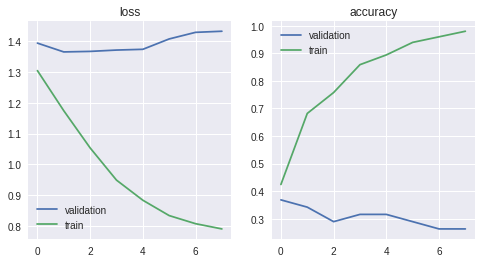

In [21]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 2,
                                             batch_size= 30,
                                             num_validation =38)
model = Model().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.384629
Train Epoch: 0 [150/198 (71%)]	Loss: 1.390864
train loss: 1.2673, Accuracy: 89/198 (45%)
validation loss: 1.3767, Accuracy: 12/38 (32%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.223021
Train Epoch: 1 [150/198 (71%)]	Loss: 1.218457
train loss: 1.0856, Accuracy: 149/198 (75%)
validation loss: 1.3470, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.179268
Train Epoch: 2 [150/198 (71%)]	Loss: 1.162752
train loss: 0.9954, Accuracy: 162/198 (82%)
validation loss: 1.3823, Accuracy: 9/38 (24%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.958158
Train Epoch: 3 [150/198 (71%)]	Loss: 1.102116
train loss: 0.9144, Accuracy: 169/198 (85%)
validation loss: 1.3851, Accuracy: 11/38 (29%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.934361
Train Epoch: 4 [150/198 (71%)]	Loss: 0.923

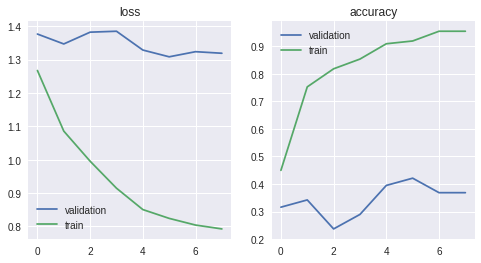

In [20]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 3,
                                             batch_size= 30,
                                             num_validation =38)
model = Model().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (196, 22, 1000)
Train labels shape:  (196,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/196 (0%)]	Loss: 1.387310
Train Epoch: 0 [150/196 (71%)]	Loss: 1.352140
train loss: 1.3140, Accuracy: 77/196 (39%)
validation loss: 1.3802, Accuracy: 11/38 (29%)

Train Epoch: 1 [0/196 (0%)]	Loss: 1.369521
Train Epoch: 1 [150/196 (71%)]	Loss: 1.307214
train loss: 1.2357, Accuracy: 103/196 (53%)
validation loss: 1.3520, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/196 (0%)]	Loss: 1.241109
Train Epoch: 2 [150/196 (71%)]	Loss: 1.119566
train loss: 1.1222, Accuracy: 120/196 (61%)
validation loss: 1.3679, Accuracy: 11/38 (29%)

Train Epoch: 3 [0/196 (0%)]	Loss: 1.217095
Train Epoch: 3 [150/196 (71%)]	Loss: 1.143366
train loss: 1.0507, Accuracy: 134/196 (68%)
validation loss: 1.3891, Accuracy: 12/38 (32%)

Train Epoch: 4 [0/196 (0%)]	Loss: 1.090542
Train Epoch: 4 [150/196 (71%)]	Loss: 1.15

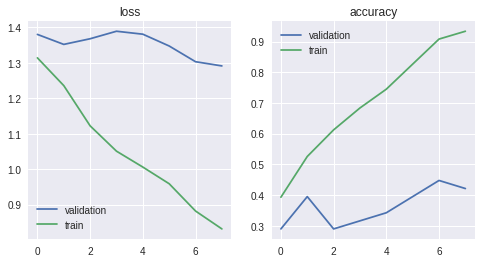

In [24]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 4,
                                             batch_size= 30,
                                             num_validation =38)
model = Model().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (197, 22, 1000)
Train labels shape:  (197,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/197 (0%)]	Loss: 1.382074
Train Epoch: 0 [150/197 (71%)]	Loss: 1.347578
train loss: 1.2574, Accuracy: 106/197 (54%)
validation loss: 1.3606, Accuracy: 12/38 (32%)

Train Epoch: 1 [0/197 (0%)]	Loss: 1.281291
Train Epoch: 1 [150/197 (71%)]	Loss: 1.174787
train loss: 1.0984, Accuracy: 154/197 (78%)
validation loss: 1.3170, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/197 (0%)]	Loss: 1.146591
Train Epoch: 2 [150/197 (71%)]	Loss: 1.173273
train loss: 0.9625, Accuracy: 165/197 (84%)
validation loss: 1.3017, Accuracy: 15/38 (39%)

Train Epoch: 3 [0/197 (0%)]	Loss: 0.995249
Train Epoch: 3 [150/197 (71%)]	Loss: 0.979058
train loss: 0.8728, Accuracy: 180/197 (91%)
validation loss: 1.2778, Accuracy: 16/38 (42%)

Train Epoch: 4 [0/197 (0%)]	Loss: 0.868243
Train Epoch: 4 [150/197 (71%)]	Loss: 0.8

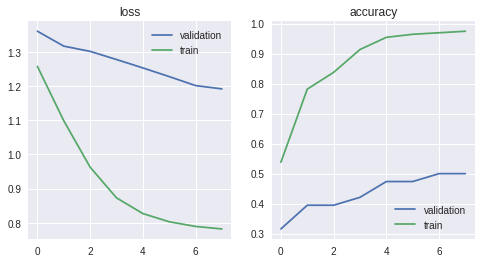

In [26]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 5,
                                             batch_size= 30,
                                             num_validation =38)
model = Model().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (49, 22, 1000)
test labels shape:  (49,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.393877
Train Epoch: 0 [150/198 (71%)]	Loss: 1.485145
train loss: 1.2838, Accuracy: 85/198 (43%)
validation loss: 1.3759, Accuracy: 12/38 (32%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.306539
Train Epoch: 1 [150/198 (71%)]	Loss: 1.177382
train loss: 1.0974, Accuracy: 140/198 (71%)
validation loss: 1.2976, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.064252
Train Epoch: 2 [150/198 (71%)]	Loss: 1.088080
train loss: 0.9808, Accuracy: 155/198 (78%)
validation loss: 1.3470, Accuracy: 11/38 (29%)

Train Epoch: 3 [0/198 (0%)]	Loss: 1.005582
Train Epoch: 3 [150/198 (71%)]	Loss: 1.007067
train loss: 0.9047, Accuracy: 171/198 (86%)
validation loss: 1.3279, Accuracy: 14/38 (37%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.907316
Train Epoch: 4 [150/198 (71%)]	Loss: 0.93

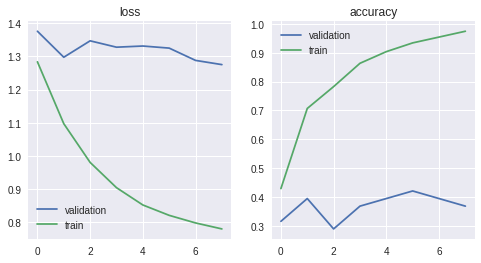

In [27]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 6,
                                             batch_size= 30,
                                             num_validation =38)
model = Model().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/200 (0%)]	Loss: 1.381410
Train Epoch: 0 [150/200 (71%)]	Loss: 1.450829
train loss: 1.2984, Accuracy: 88/200 (44%)
validation loss: 1.3767, Accuracy: 11/38 (29%)

Train Epoch: 1 [0/200 (0%)]	Loss: 1.262031
Train Epoch: 1 [150/200 (71%)]	Loss: 1.215759
train loss: 1.1543, Accuracy: 119/200 (60%)
validation loss: 1.3173, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/200 (0%)]	Loss: 1.191427
Train Epoch: 2 [150/200 (71%)]	Loss: 1.109253
train loss: 1.0634, Accuracy: 133/200 (66%)
validation loss: 1.3281, Accuracy: 14/38 (37%)

Train Epoch: 3 [0/200 (0%)]	Loss: 1.030824
Train Epoch: 3 [150/200 (71%)]	Loss: 1.118374
train loss: 0.9442, Accuracy: 161/200 (80%)
validation loss: 1.3173, Accuracy: 16/38 (42%)

Train Epoch: 4 [0/200 (0%)]	Loss: 0.989655
Train Epoch: 4 [150/200 (71%)]	Loss: 0.92

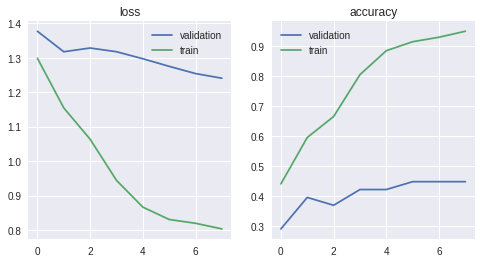

In [32]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 7,
                                             batch_size= 30,
                                             num_validation =38)
model = Model().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (194, 22, 1000)
Train labels shape:  (194,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/194 (0%)]	Loss: 1.390331
Train Epoch: 0 [150/194 (71%)]	Loss: 1.359543
train loss: 1.2149, Accuracy: 131/194 (68%)
validation loss: 1.3182, Accuracy: 16/38 (42%)

Train Epoch: 1 [0/194 (0%)]	Loss: 1.237735
Train Epoch: 1 [150/194 (71%)]	Loss: 1.158424
train loss: 1.0502, Accuracy: 143/194 (74%)
validation loss: 1.2666, Accuracy: 17/38 (45%)

Train Epoch: 2 [0/194 (0%)]	Loss: 1.057284
Train Epoch: 2 [150/194 (71%)]	Loss: 1.092939
train loss: 0.9336, Accuracy: 169/194 (87%)
validation loss: 1.2476, Accuracy: 20/38 (53%)

Train Epoch: 3 [0/194 (0%)]	Loss: 1.058492
Train Epoch: 3 [150/194 (71%)]	Loss: 1.129504
train loss: 0.8682, Accuracy: 179/194 (92%)
validation loss: 1.2679, Accuracy: 18/38 (47%)

Train Epoch: 4 [0/194 (0%)]	Loss: 0.858906
Train Epoch: 4 [150/194 (71%)]	Loss: 0.8

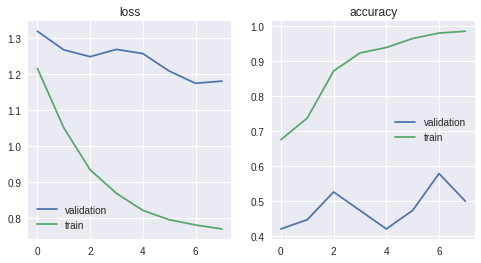

In [33]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 8,
                                             batch_size= 30,
                                             num_validation =38)
model = Model().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (193, 22, 1000)
Train labels shape:  (193,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/193 (0%)]	Loss: 1.388152
Train Epoch: 0 [150/193 (71%)]	Loss: 1.449911
train loss: 1.2935, Accuracy: 89/193 (46%)
validation loss: 1.3954, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/193 (0%)]	Loss: 1.238694
Train Epoch: 1 [150/193 (71%)]	Loss: 1.228978
train loss: 1.1196, Accuracy: 144/193 (75%)
validation loss: 1.3481, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/193 (0%)]	Loss: 1.222859
Train Epoch: 2 [150/193 (71%)]	Loss: 1.119218
train loss: 0.9238, Accuracy: 177/193 (92%)
validation loss: 1.3058, Accuracy: 14/38 (37%)

Train Epoch: 3 [0/193 (0%)]	Loss: 0.946282
Train Epoch: 3 [150/193 (71%)]	Loss: 0.985071
train loss: 0.8376, Accuracy: 183/193 (95%)
validation loss: 1.2974, Accuracy: 15/38 (39%)

Train Epoch: 4 [0/193 (0%)]	Loss: 0.895853
Train Epoch: 4 [150/193 (71%)]	Loss: 0.92

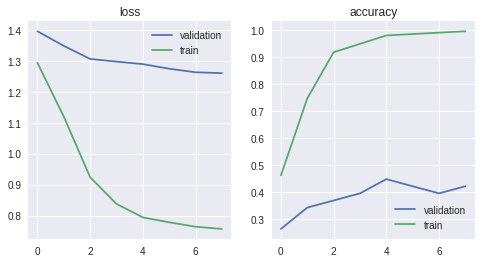

In [34]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 9,
                                             batch_size= 30,
                                             num_validation =38)
model = Model().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (1782, 22, 1000)
Train labels shape:  (1782,)
test data shape:  (443, 22, 1000)
test labels shape:  (443,)
Validation data shape:  (333, 22, 1000)
Validation labels shape:  (333,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
Train Epoch: 0 [0/1782 (0%)]	Loss: 1.382740
Train Epoch: 0 [150/1782 (8%)]	Loss: 1.436299
Train Epoch: 0 [300/1782 (17%)]	Loss: 1.492467
Train Epoch: 0 [450/1782 (25%)]	Loss: 1.321940
Train Epoch: 0 [600/1782 (33%)]	Loss: 1.348902
Train Epoch: 0 [750/1782 (42%)]	Loss: 1.364929
Train Epoch: 0 [900/1782 (50%)]	Loss: 1.265275
Train Epoch: 0 [1050/1782 (58%)]	Loss: 1.465608
Train Epoch: 0 [1200/1782 (67%)]	Loss: 1.316314
Train Epoch: 0 [1350/1782 (75%)]	Loss: 1.409429
Train Epoch: 0 [1500/1782 (83%)]	Loss: 1.415075
Train Epoch: 0 [1650/1782 (92%)]	Loss: 1.310682
train loss: 1.2238, Accuracy: 954/1782 (54%)
validation loss: 1.3251, Accuracy: 123/333 (37%)

Train Epoch: 1 [0/1782 (0%)]	Loss: 1.216513
Train Epoch: 1 [150/1782 (8%)]	Loss

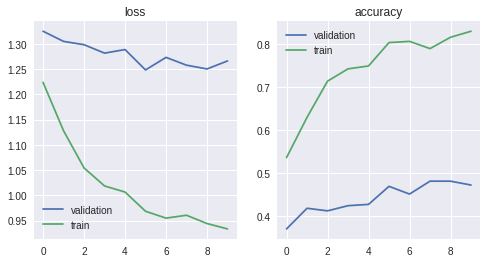

In [36]:
train_loader, test_loader, val_loader, test_loaders = loader()(subject = "ALL",
                                                            batch_size = 30,
                                                            num_validation = 37)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    break
model = Model().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(test_loaders[i], mode = 'val',device=device)